# Deterministic modeling

In [1]:
%matplotlib inline
import matplotlib 
import numpy as np
from math import *
import pylab as pl
from scipy.integrate import odeint

## Positive autoregulation

Let's consider a positively autoregulated circuit using the following dynamics:
$$\frac{dX}{dt} = \beta_1 + \beta_2 X - \alpha X . $$
We can understand each contribution separately: $\beta_1$ represents X's constitutive expression and translation, $\beta_2$ represents its positive autoregulation, while $\alpha$ its degradation.

We show below an implementation to numerically integrate the above differential equation, from scipy library.

In [25]:
def f(X,t, param):
    
    # Getting parameters
    beta1  = param[0]
    beta2  = param[1]
    alpha  = param[2]
    
    # Calculating the derivative
    dXdt = beta1 + beta2*X - alpha*X
    
    return dXdt

In [38]:
def run(beta1 = 1., beta2 = 1., alpha = 2.0, tf = 10, X0 = 2.):
    
    # Simulating
    np1 = 20
    t  = np.linspace(0, tf, tf*np1)
    soln = odeint(f, X0, t, rtol=1e-9, atol=1e-9, args = ([beta1, beta2, alpha],))
    
    # Plotting the results
    pl.figure( figsize=(12,5), dpi=300 )
    
    # First the mRNA concentrations
    pl.subplot(121)
    pl.plot(t, soln[:])
    pl.ylabel('mRNA concentration')
    pl.xlabel('t (au)')
    pl.ylim(0,soln.max()*1.2)
    
    pl.show()
    
    return

Let's try our dynamical system with standard parameters.

Standard parameters


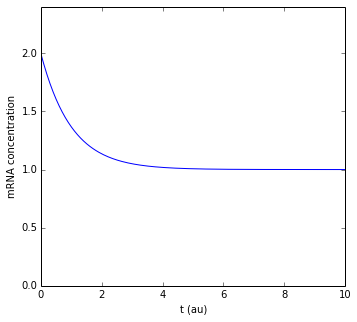

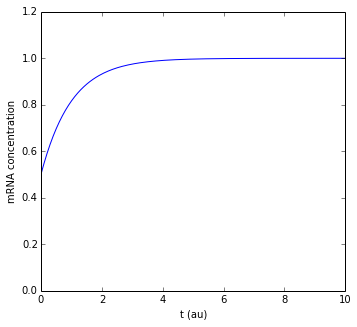

In [46]:
run()
run(X0 = 0.5)

Smaller $\alpha$

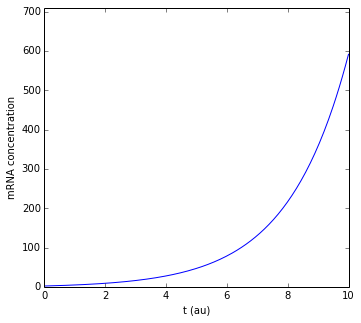

In [53]:
run(alpha = 0.5, tf=10.)

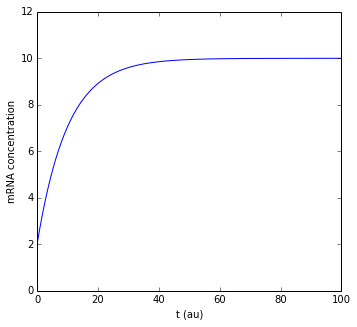

In [54]:
run(alpha = 1.1, tf=100.)

Critical case


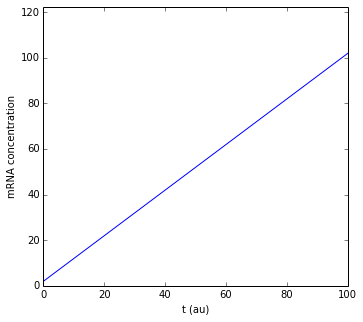

In [55]:
print 'Critical case'
run(alpha = 1., tf=100.)

By analysing the fixed point of the system, i.e., solutions of 
$$\frac{dX^{\ast}}{dt}=0,$$
we find that
$$X^{\ast} = \frac{\beta_1}{\alpha - \beta_2}$$
whenever $\beta_2 \neq \alpha$. If $\beta_2 = \alpha$, $X^{\ast}=\beta_1$. However, the above phenomenon can be actually explained when we study the stability of these fixed points:
$$\frac{dX^{2}}{dt^2}=(\beta_2-\alpha),$$
which means we only have stable solutions when $\beta_2>\alpha$. As we can see above, when we tested $\alpha>\beta_2$, $X$ grows undefinitely.


## A bit more complicated

Let's solve a slightly different model:
$$\frac{dX}{dt} = \beta_1 + \beta_2 \frac{X^n}{K^n + X^n} - \alpha X . $$
In this case, the regulation is considered more realistic .

In [85]:
def f(X,t, param):
    
    # Getting parameters
    beta1  = param[0]
    beta2  = param[1]
    alpha  = param[2]
    n      = param[3]
    K      = param[4]
    
    # Calculating the derivative
    dXdt = beta1 + beta2*X**n/(K**n + X**n) - alpha*X
    
    return dXdt

In [87]:
def run(beta1 = 0., K = 1., n = 2., beta2 = 1., alpha = 2.0, tf = 10, X0 = 2.):
    
    # Simulating
    np1 = 20
    t  = np.linspace(0, tf, tf*np1)
    soln = odeint(f, X0, t, rtol=1e-9, atol=1e-9, args = ([beta1, beta2, alpha, n, K],))
    
    # Plotting the results
    pl.figure( figsize=(12,5), dpi=300 )
    
    # First the mRNA concentrations
    pl.subplot(121)
    pl.plot(t, soln[:])
    pl.ylabel('mRNA concentration')
    pl.xlabel('t (au)')
    pl.ylim(0,soln.max()*1.2)
    
    pl.show()
    
    return

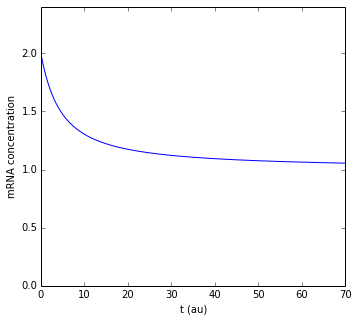

In [91]:
run(alpha=0.5, tf=70.)

## Repressilator - Modeling and predicting behavior of a synthetic oscillator

We want to model three repressing genes.

<img src="circuit.png" style:"height: 10px;" />

## Defining the dynamical system

In [56]:
def shill(p, alpha, n, KM):
    """Specialized Hill Function"""
    return alpha/( 1 + (p/1)**n )

def f(X,t, param):
    m_lacl = X[0]
    p_cl   = X[1]
    m_tetR = X[2]
    p_lacl = X[3]
    m_cl   = X[4]
    p_tetR = X[5]
    
    # Getting parameters
    alpha  = param[0]
    alpha0 = param[1]
    beta   = param[2]
    n      = param[3]
    KM     = param[4]
    
    dm_lacl  = -m_lacl + shill(p_cl, alpha, n, KM)   + alpha0
    dm_tetR  = -m_tetR + shill(p_lacl, alpha, n, KM) + alpha0
    dm_cl    = -m_cl   + shill(p_tetR, alpha, n, KM) + alpha0
    
    dp_cl    = -beta*( p_cl   - m_cl )
    dp_lacl  = -beta*( p_lacl - m_lacl )
    dp_tetR  = -beta*( p_tetR - m_tetR )
    
    derivatives = [dm_lacl, dp_cl, dm_tetR, dp_lacl, dm_cl, dp_tetR]
    
    return derivatives

## Simulating the dynamical system

In [65]:
def run(beta = 200., alpha = 10, alpha0 = 1., n = 2.0, tf = 50, X0 = [2., 0., 5., 0., 10., 0.], KM=40):
    
    # Simulating
    np1 = 100
    t  = np.linspace(0, tf, tf*np1)
    soln = odeint(f, X0, t, rtol=1e-9, atol=1e-9, args = ([alpha, alpha0, beta, n, KM],))
    
    
    # Plotting the results
    pl.figure( figsize=(12,5), dpi=300 )
    
    # First the mRNA concentrations
    pl.subplot(121)
    pl.plot(t, soln[:,0])
    pl.plot(t, soln[:,2])
    pl.plot(t, soln[:,4])
    pl.ylabel('mRNA concentration')
    pl.xlabel('t (au)')
    
    # Then the protein concentrations
    pl.subplot(122)
    pl.plot(t, soln[:,1])
    pl.plot(t, soln[:,3])
    pl.plot(t, soln[:,5])
    pl.ylabel('Protein concentration')
    pl.xlabel('t (au)')
    
    
    pl.show()
    
    return t, soln

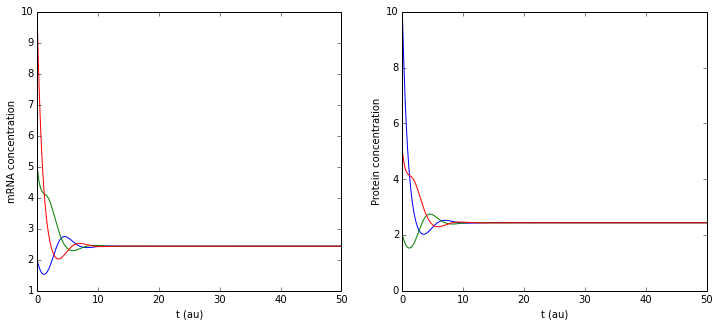

In [63]:
run();

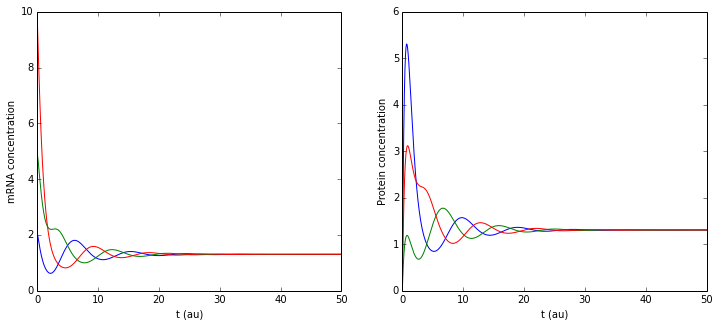

In [84]:
run(beta = 2., alpha = 3., alpha0 = 0.2, n = 2.0);

It is almost oscillating. Using the Phase Portrait in Elowits & Leibler paper, we can set the parameters into a state where the system keeps oscillating. 

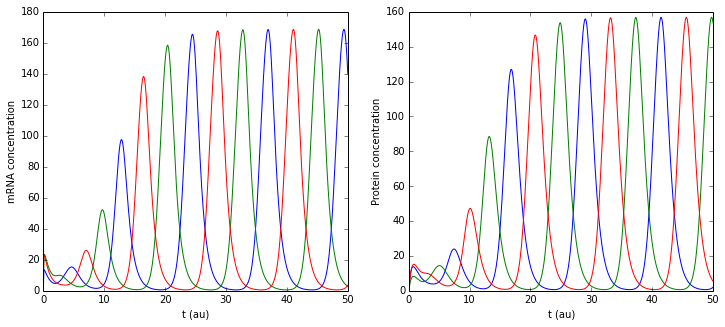

In [73]:
run(beta = 2., alpha = 300, alpha0 = 0.2, n = 2.0);

Studying the phase space

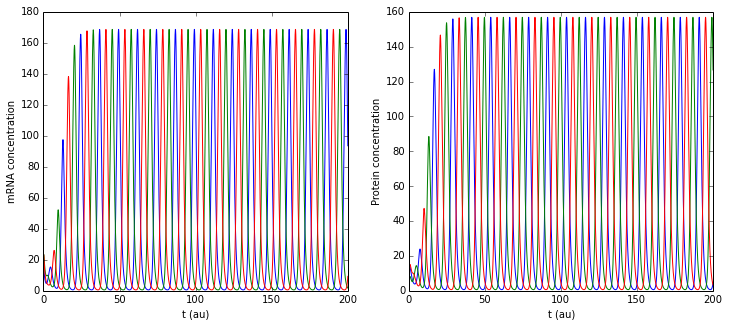

Number of points:  (20000,)


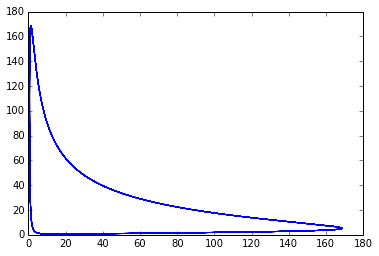

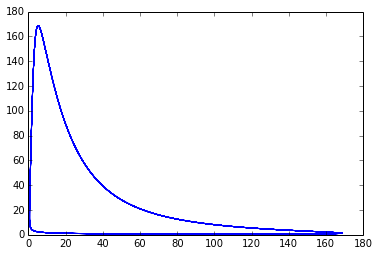

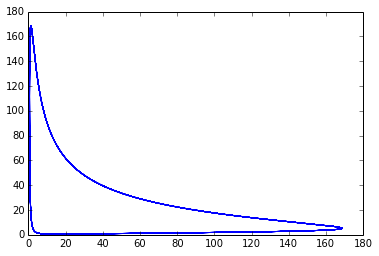

In [81]:
t, sol1 = run(beta = 2., alpha = 300, alpha0 = 0.2, n = 2.0, tf = 200.)

print 'Number of points: ', t.shape

pl.plot(sol1[5000:,0], sol1[5000:,2])
pl.show()
pl.plot(sol1[5000:,0], sol1[5000:,4])
pl.show()
pl.plot(sol1[5000:,2], sol1[5000:,4])
pl.show()